In [23]:
# importando bibliotecas
import numpy as np
from outliers. smirnov_grubbs import two_sided_test_outliers as grubbs
from scipy import stats
from typing import Tuple, Dict

In [63]:
def limits(
    Y : np.ndarray, 
    multiplier : float = 1.5
) -> tuple[float, float]:
    
    q1 = np.quantile(Y, 0.25)
    q3 = np.quantile(Y, 0.75)
    iqr = q3 - q1
    
    inf = q1 - multiplier * iqr
    sup = q3 + multiplier * iqr
    
    return inf, sup

def outlier_test(
    Y : np.ndarray, 
    inf : float,
    sup : float,
    significances : list = [0.5, 0.25]
) -> Dict[str,np.ndarray]:
    
    # veja: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h1.htm
    
    '''
    O teste de Grubbs é utilizado para detectar outliers em amostras que
    segue distribuição aproximadamente normal:
    
    Aplicação do teste de Shapiro-Wilk para testar normalidade
    da distribuição. (alpha = 0.05)
    Se confirmada a H0, aplica-se o teste de Grubbs binomial.

    Teste de normalidade da distribuição:
    - H0 => A amostra é normal de valor p > alpha.
    - H1 => A amostra não é normal de valor p < alpha
    '''
    
    _, p = stats.shapiro(Y)
    norm = dict()
    out_values = dict()
    
    if p > 0.05:
        for a in significances:
            
            outliers = grubbs(Y,alpha=a)
            out_values[f'alpha_{a}'] = outliers
            Yi = Y.copy()
            for i, yi in enumerate(Yi):
                if yi in outliers:
                    if yi < inf:
                        Yi[i] = inf
                    else:
                        Yi[i] = sup
                        
            norm[f'alpha_{a}'] = Yi
            
        return norm, out_values
    
    else:
        print("A amostra não parece normal. Rejeitada a H0.")
        return None, None

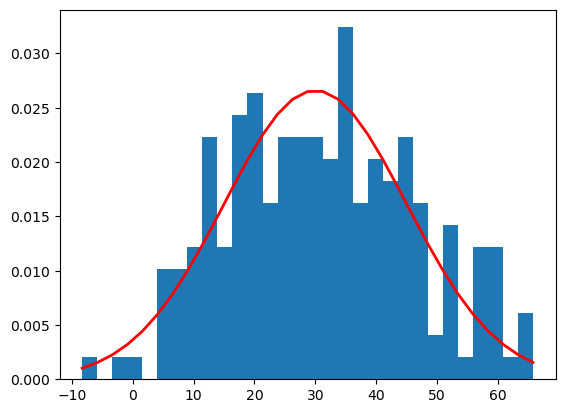

In [50]:
# gerando amostra
np.random.seed(0)
m, s, N = 30, 15, 200
x = np.random.normal(m, s, N)

# plot from numpy docs
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(s * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - m)**2 / (2 * s**2) ),
         linewidth=2, color='r')
plt.show()

In [81]:
# adicionando outliers para teste
x[0], x[1] = 80, -25

# definindo limites e aplicando func
inf, sup = limits(x)

norm, outliers = outlier_test(x, inf, sup, [0.5, 0.25])

# print resultados
if outliers:
    for alpha in outliers.keys():
        print(f'Outliers para {alpha}: {outliers[alpha]}')

Outliers para alpha_0.5: [-25.0, 80.0]
Outliers para alpha_0.25: [-25.0]
